## Sales Analysis

In [26]:
import os
import pandas as pd

#### Task 1. Merging 12 months of sales data into a single file

In [96]:
path = 'C:/Users/Катя/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]

data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:/Users/Катя/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
    data = pd.concat([data, df])
    
data.to_csv('data.csv', index = False)

#### Read an updated dataframe

In [97]:
data = pd.read_csv('data.csv')

df = pd.DataFrame(data)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augment data with additional columns

#### Task 2. Add Month Column

In [105]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\335335608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\335335608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
185682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
185683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
185684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Find text in date columns and delete it

In [99]:
#temp_df = df[#condition]
temp_df = df[df['Order Date'].str[0:2]=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [100]:
df = df[df['Order Date'].str[0:2]!='Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Convert columns to the correct type

In [101]:
#df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
#df['Price Each'] = df['Price Each'].astype('float')

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2975201665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2975201665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Task 3. Add a sales column

In [106]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')
df

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2211399045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
185682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
185684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Task 4. Add city column

In [107]:
df[['Address','City','Zip-code']] = df['Purchase Address'].str.split(',',2, expand=True)
df

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2829257238.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Address','City','Zip-code']] = df['Purchase Address'].str.split(',',2, expand=True)
C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2829257238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Address','City','Zip-code']] = df['Purchase Address'].str.split(',',2, expand=True)
C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2829257238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Address,City,Zip-code
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA 90001
185682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA 94016
185683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA 94016
185684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA 94016


## Data Cleaning

#### Remove duplicates

In [103]:
df = df.drop_duplicates()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Remove null values

In [104]:
#CHECK
nan_df = df[df.isna().any(axis=1)]
nan_df

#REMOVE
df = df.dropna(how='all')
#df = df.dropna(how='all')

#REASSIGN INDICES
df.reset_index(drop=True, inplace = True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
185682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
185683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
185684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Data Exploration

#### Q1. What was the best month for sales? How much was earned that month?

In [156]:
by_months = df.groupby('Month').sum()
display(by_months.sort_values(by = 'Sales', ascending = False))

#display(by_months.iloc[0,2])
sales = by_months.iloc[0, 2]  
formatted_value = '{:,.2f}'.format(sales)
 

print('The best sales:')
print(formatted_value)


C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\1358183262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_months = df.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
12,28074.0,4583267.77,4608295.70
10,22669.0,3713608.80,3734777.86
4,20536.0,3366218.76,3389217.98
11,19769.0,3178872.53,3197875.05
5,18653.0,3133134.61,3150616.23
3,16979.0,2789084.64,2804973.35
7,16054.0,2631225.12,2646461.32
6,15234.0,2560503.50,2576280.15
8,13429.0,2226963.90,2241083.37


The best sales:
1,821,413.16


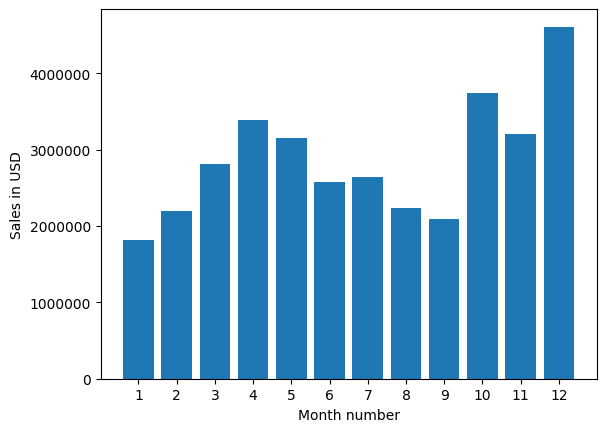

In [157]:
import matplotlib.pyplot as plt

plt.ticklabel_format(style = 'plain')

months = range(1,13)

plt.bar(months,by_months['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

#### What city had the highest number of sales?



In [116]:
money_by_city = df.groupby('City')['Quantity Ordered', 'Sales'].sum()
money_by_city = money_by_city.sort_values(by = 'Sales', ascending = False)
display(money_by_city)


C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\3180483707.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  money_by_city = df.groupby('City')['Quantity Ordered', 'Sales'].sum()


,Quantity Ordered,Sales
City,,
San Francisco,50169.0,8254743.55
Los Angeles,33247.0,5448304.28
New York City,27903.0,4661867.14
Boston,22494.0,3658627.65
Atlanta,16584.0,2794199.07
Dallas,16707.0,2765373.96
Seattle,16534.0,2745046.02
Portland,14037.0,2319331.94
Austin,11137.0,1818044.33


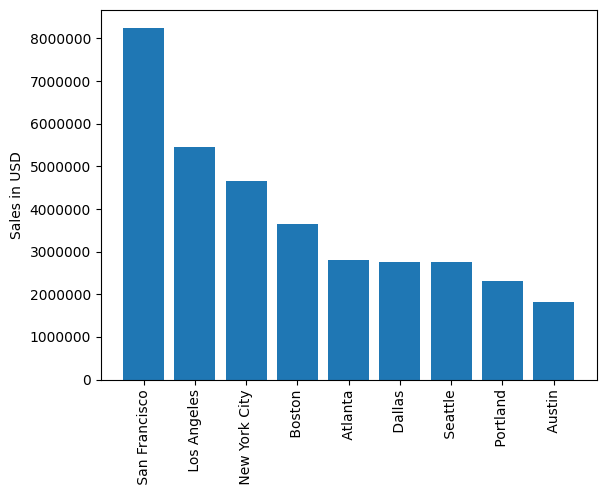

In [163]:
cities = list(money_by_city.index.unique())

plt.ticklabel_format(style = 'plain')
plt.bar(cities,money_by_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.show()


#### What time shoul we display advertisements to maximize likelihood of customer's buying product?


In [193]:
def get_hour(time):
    a = int(time.split(" ")[1].split(":")[1])
    if a < 30:
        return int(time.split(" ")[1].split(":")[0])
    else:
        return int(time.split(" ")[1].split(":")[0])+1

df['Hour'] = df['Order Date'].apply(lambda x: get_hour(x))
df['Hour'] = df['Hour'].replace({24: 0})
df.head(5)

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\571624876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].apply(lambda x: get_hour(x))
C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\571624876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].replace({24: 0})


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Address,City,Zip-code,Hour,Column,Count
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,9,1,1
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,23,1,1
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,15,1,1
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,15,1,1
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,9,1,1


In [201]:
df['Count'] = 1
purchase_by_hour = df.groupby('Hour', as_index=False)['Count'].sum()
purchase_by_hour = purchase_by_hour.sort_values(by='Hour', ascending = True)
purchase_by_hour

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\2795738015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'] = 1


,Hour,Count
0,0,5072
1,1,3012
2,2,1718
3,3,949
4,4,779
5,5,1011
6,6,1846
7,7,3187
8,8,5018
9,9,7556


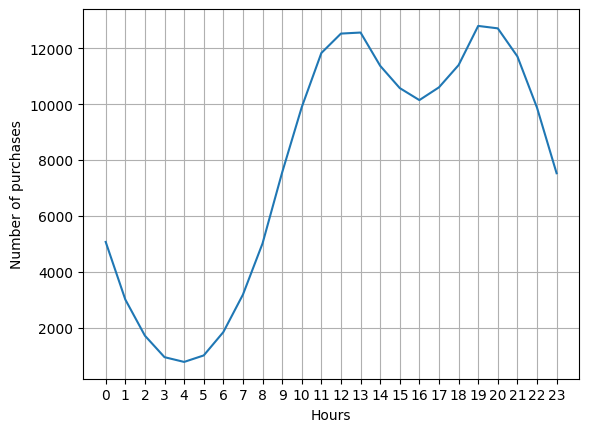

In [206]:
hours = range(0,24)

plt.ticklabel_format(style = 'plain')
plt.plot(hours,purchase_by_hour['Count'])
plt.xticks(hours)
plt.ylabel('Number of purchases')
plt.xlabel('Hours')
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [220]:
dupl = df[df['Order ID'].duplicated(keep=False)]
dupl

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Address,City,Zip-code,Hour,Column,Count
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,15,1,1
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,15,1,1
17,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,20,1,1
18,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,20,1,1
30,176586,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,365 Center St,San Francisco,CA 94016,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185629,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,106 7th St,Atlanta,GA 30301,20,1,1
185640,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,241 Highland St,Atlanta,GA 30301,0,1,1
185641,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,241 Highland St,Atlanta,GA 30301,0,1,1
185677,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,519 Maple St,San Francisco,CA 94016,14,1,1


In [221]:
dupl['Grouped'] = dupl.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

dupl = dupl[['Order ID', 'Grouped']].drop_duplicates()
dupl

C:\Users\Катя\AppData\Local\Temp\ipykernel_13964\1814740315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupl['Grouped'] = dupl.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
185600,259277,"iPhone,Wired Headphones"
185621,259297,"iPhone,Lightning Charging Cable"
185628,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185640,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [227]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dupl['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
